In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simple dataset creation

Let's create a simple dataset from sklearn and plot it. Note that we want our labels to be -1 and 1.

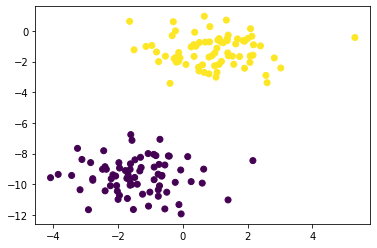

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

plt.scatter(X[:,0], X[:,1], c=y)
y=2*y-1

## Perceptron Class

Let's implement the perceptron class.  It will have both train() and test() functions as in the algorithm described in class.

In [13]:
class Perceptron:
    def __init__(self):
        return
    
    def train(self, X, y, max_iter=100):
        w = np.zeros(len(X[0]))
        b = 0
        for n in range(max_iter):
            for i in range(len(X)):
                a = np.dot(w,X[i])+b
                if (y[i]*a <= 0):
                    w += y[i]*X[i]
                    b += y[i]
        self.w = w
        self.b = b
        return
    
    def test(self, x):
        return np.sign(np.dot(self.w,x)+self.b)

## Training and Testing 

We want to split our training and testing data as normal and then train and test on the dataset.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
per = Perceptron()
per.train(X_train,y_train)
y_predict = [per.test(x) for x in X_test]
print(accuracy_score(y_test,y_predict))

1.0


## Real Dataset

Let's use scikit-learn's toy dataset breast cancer to evaluate how our perceptron does on real-world data. Don't forget to update y so that its labels are -1 and 1.

In [20]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
y = 2*y-1
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
per = Perceptron()
per.train(X_train,y_train,max_iter=1000)
y_predict = [per.test(x) for x in X_test]
print(accuracy_score(y_test,y_predict))

0.956140350877193


## Training and Testing

Let's train and test on the real-world data.